In [63]:
import pandas as pd
import numpy as np
from datetime import timedelta, datetime
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import prepare
from sklearn.model_selection import TimeSeriesSplit
import statsmodels.api as sm

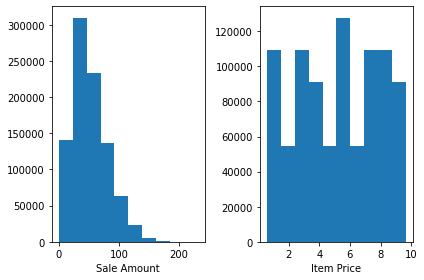

In [3]:
df = prepare.prepare_store_data()

In [5]:
df.head(4)

,item_id,sale_amount,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14,day_of_week,month,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,Tuesday,1,10.92
2013-01-01 00:00:00+00:00,12,26.0,211817,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,Tuesday,1,218.40
2013-01-01 00:00:00+00:00,46,27.0,832657,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,Tuesday,1,125.55
2013-01-01 00:00:00+00:00,12,54.0,213643,8,15000 San Pedro Ave,San Antonio,TX,78232,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,Tuesday,1,453.60


### Split your data into train and test using the sklearn.model_selection.TimeSeriesSplit method.

In [42]:
ts_data = df.sale_amount.resample('D').agg(sum)

In [43]:
ts_data.head(2)

sale_date
2013-01-01 00:00:00+00:00    13696.0
2013-01-02 00:00:00+00:00    13678.0
Freq: D, Name: sale_amount, dtype: float64

In [44]:
train_size = int(0.66 * len(ts_data))

In [45]:
train_size

1205

In [166]:
train, test = ts_data[0:train_size],ts_data[train_size:len(ts_data)]

In [167]:
print('Observations: %d' % (len(ts_data)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))

Observations: 1826
Training Observations: 1826
Testing Observations: 0


#### Validate your splits by plotting X_train and y_train.

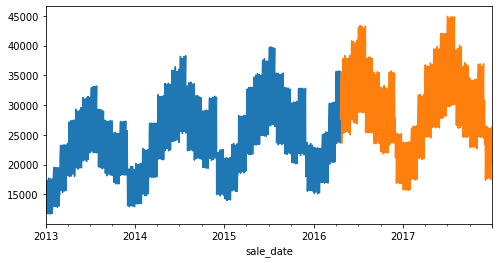

In [48]:
plt.figure(figsize=(8, 4))
train.plot()
test.plot()

#### Plot the weekly average & the 7-day moving average. Compare the 2 plots.

In [89]:
train.head(2)

sale_date
2013-01-01 00:00:00+00:00    13696.0
2013-01-02 00:00:00+00:00    13678.0
Freq: D, Name: sale_amount, dtype: float64

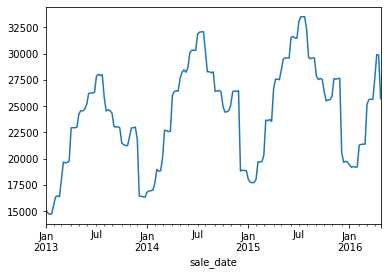

In [52]:
train.resample('W').mean().plot()

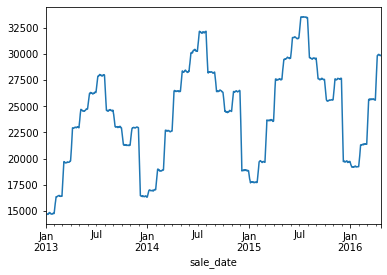

In [53]:
train.rolling(7).mean().plot()

#### Plot the daily difference. Observe whether usage seems to vary drastically from day to day or has more of a smooth transition.

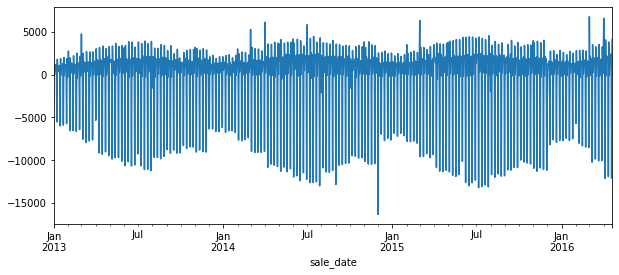

In [59]:
plt.figure(figsize=(10, 4))
train.diff().plot()

#### Plot a time series decomposition.

In [65]:
decomposition = sm.tsa.seasonal_decompose(train.resample('W').mean(), model='additive')

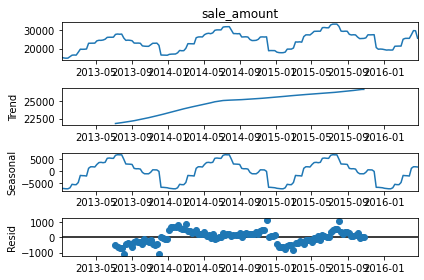

In [75]:
decomposition.plot()
None

#### Create a lag plot (day over day).

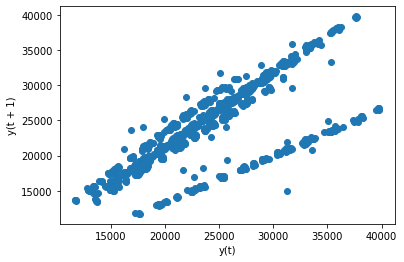

In [76]:
pd.plotting.lag_plot(train, lag=1)

#### Run a lag correlation.

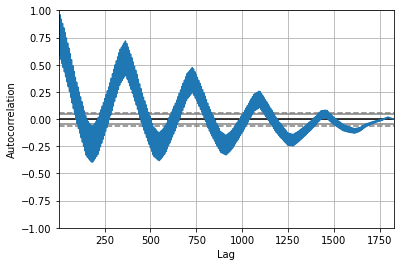

In [168]:
pd.plotting.autocorrelation_plot(train)

In [78]:
df_corr = pd.concat([train.shift(1), train], axis=1)
df_corr.columns = ['t-1','t+1']
result = df_corr.corr()
print(result)

          t-1       t+1
t-1  1.000000  0.731391
t+1  0.731391  1.000000


****
#### Using your OPS data you prepped in lesson 2 exercises:

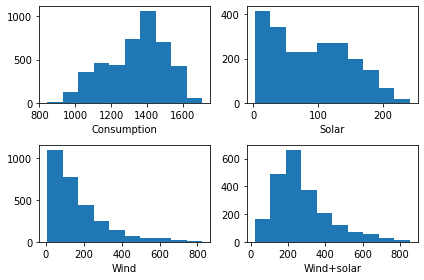

In [106]:
ops = prepare.prepare_ops_data()

In [134]:
ops

Date
2006-01-01    1069.18400
2006-01-02    1380.52100
2006-01-03    1442.53300
2006-01-04    1457.21700
2006-01-05    1477.13100
                 ...    
2017-12-27    1263.94091
2017-12-28    1299.86398
2017-12-29    1295.08753
2017-12-30    1215.44897
2017-12-31    1107.11488
Name: Consumption, Length: 4383, dtype: float64

In [108]:
ops = ops.Consumption
ops.head(4)

Date
2006-01-01    1069.184
2006-01-02    1380.521
2006-01-03    1442.533
2006-01-04    1457.217
Name: Consumption, dtype: float64

##### Split your data into train and test using the percent cutoff method.

In [109]:
train_size = int(0.66 * len(ops))

In [174]:
train, test = ops[0:train_size],ops[train_size:len(ops)]

In [111]:
train.shape, test.shape

((2892,), (1491,))

#### Validate your splits by plotting X_train and y_train.

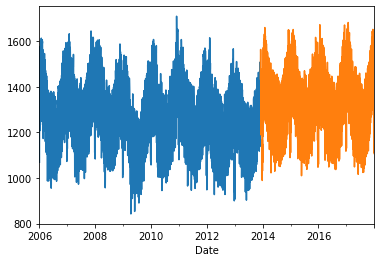

In [114]:
train.plot()
test.plot()

#### Plot the weekly average & the 7-day moving average. Compare the 2 plots.

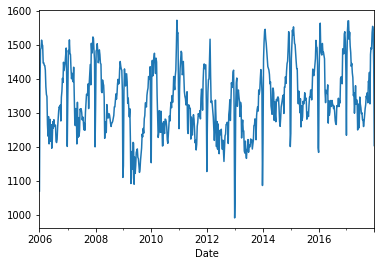

In [116]:
ops.resample('W').mean().plot()

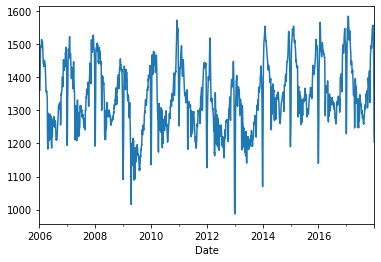

In [160]:
ops.rolling(7).mean().plot()

#### Group the electricity consumption time series by month of year, to explore annual seasonality.

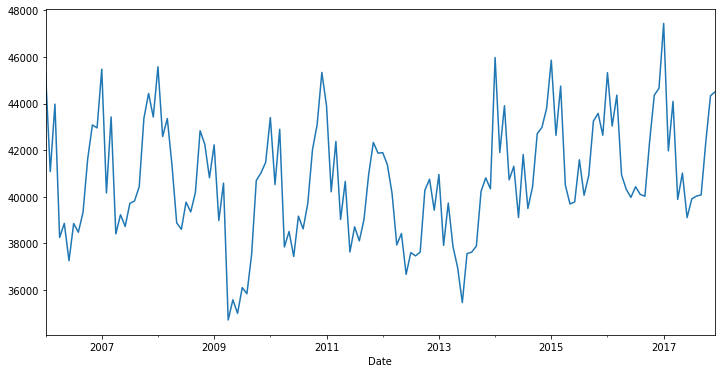

In [133]:
ops.resample('M').sum().plot(figsize = (12,6))

In [132]:
ops.resample('M').sum()

Date
2006-01-31    45304.70400
2006-02-28    41078.99300
2006-03-31    43978.12400
2006-04-30    38251.76700
2006-05-31    38858.14300
                 ...     
2017-08-31    40029.77368
2017-09-30    40078.56092
2017-10-31    42355.21893
2017-11-30    44339.72455
2017-12-31    44511.10431
Freq: M, Name: Consumption, Length: 144, dtype: float64

In [144]:
growth_rate = pd.read_clipboard()

In [146]:
growth_rate['year'] = pd.to_datetime(growth_rate.year, format = '%Y' )

In [147]:
growth_rate = growth_rate.set_index('year')

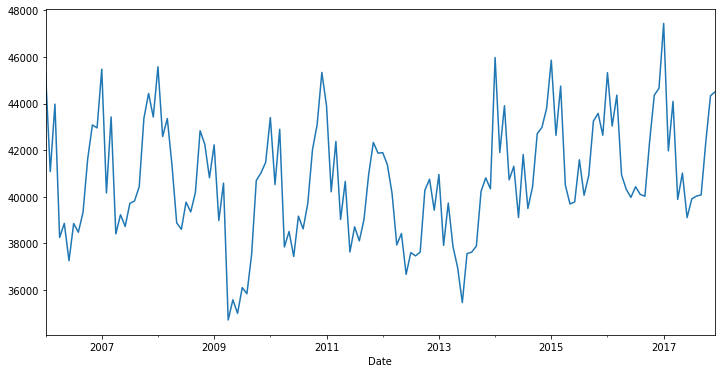

In [157]:
ops.resample('M').sum().plot(figsize = (12,6))

Text(0, 0.5, 'Growth Rate')

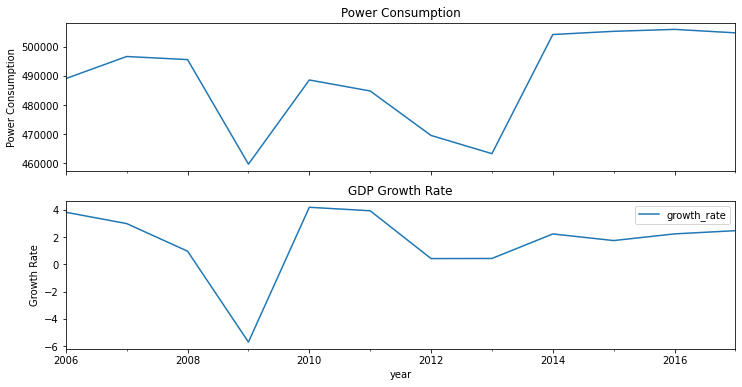

In [158]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(16, 9))

ax = ops.resample('Y').sum().plot(figsize = (12,6), ax = ax1)
ax1.set(title='Power Consumption')
ax1.set_ylabel('Power Consumption')

growth_rate.plot(ax =ax2)
ax2.set(title='GDP Growth Rate')
ax2.set_ylabel('Growth Rate')

#### Plot the daily difference. Observe whether usage seems to vary drastically from day to day or has more of a smooth transition.

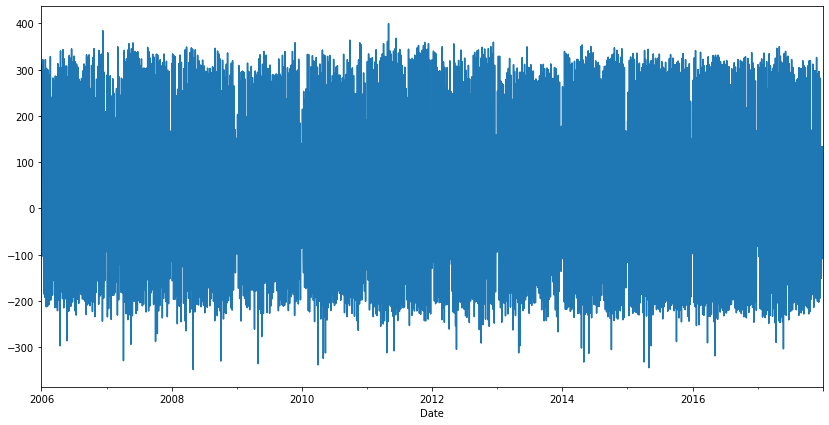

In [163]:
ops.diff().plot(figsize = (14,7))

#### Plot a time series decomposition. Takeaways?

In [175]:
decomposition = sm.tsa.seasonal_decompose(train.resample('W').mean(), model='additive')

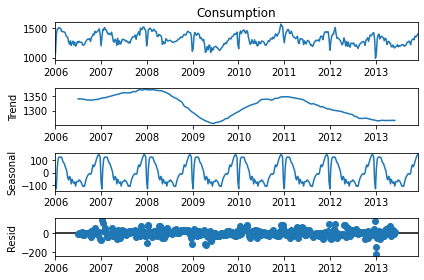

In [178]:
decomposition.plot()
None

## Bonus
For each store I want to see how many items were sold over a period of time, for each item. Find a way to chart this. Hints: Subplots for the piece with the fewest distinct values (like store), x = time, y = count, color = item. If you have too many distinct items, you may need to plot the top n, while aggregating the others into an 'other' bucket.